<a href="https://colab.research.google.com/github/rezamohamadlo/IMDB-Review-Classification/blob/main/IMDB_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Importing required packages
import tensorflow_datasets as tfds  # For loading and working with datasets
import tensorflow as tf  # For deep learning and neural network operations
import numpy as np  # For numerical operations and data manipulation

# Importing specific functions from Keras for text preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer  # For tokenizing text
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to a fixed length

In [16]:
#Download the plain text dataset
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [17]:
# Getting Training and Test Set

# Get the train and test sets from the IMDB dataset
train_data, test_data = imdb['train'], imdb['test']

# Initialize lists to hold sentences and labels for training and testing
training_sentences = []  # List to store training sentences
training_labels = []     # List to store training labels

testing_sentences = []   # List to store testing sentences
testing_labels = []      # List to store testing labels

# Loop over all training examples and save the sentences and labels
for s, l in train_data:
    # Convert the byte string to a UTF-8 decoded string and append to training_sentences
    training_sentences.append(s.numpy().decode('utf8'))
    # Append the label to training_labels (labels are already in a suitable format)
    training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s, l in test_data:
    # Convert the byte string to a UTF-8 decoded string and append to testing_sentences
    testing_sentences.append(s.numpy().decode('utf8'))
    # Append the label to testing_labels (labels are already in a suitable format)
    testing_labels.append(l.numpy())

# Convert the lists of labels to NumPy arrays for easier manipulation and processing
training_labels_final = np.array(training_labels)  # Final training labels as a NumPy array
testing_labels_final = np.array(testing_labels)    # Final testing labels as a NumPy array

In [18]:
# Parameters for Tokenization and Padding
vocab_size = 10000  # Maximum number of unique words to keep in the vocabulary
max_length = 120    # Maximum length of sequences after padding
trunc_type = 'post' # Type of truncation to apply when sequences are longer than max_length
oov_tok = "<OOV>"   # Out-of-vocabulary token to represent words not in the vocabulary

# Initializing the Tokenizer class from Keras
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generating the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)  # Fit the tokenizer on the training sentences
word_index = tokenizer.word_index  # Create a word index mapping words to their integer indices

# Generate sequences of integers for the training sentences
sequences = tokenizer.texts_to_sequences(training_sentences)  # Convert texts to sequences of integers

# Pad the training sequences to ensure uniform input size for the model
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)  # Pad sequences to max_length

# Generate sequences of integers for the test sentences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)  # Convert test texts to sequences of integers

# Pad the test sequences to ensure uniform input size for the model
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)  # Pad test sequences to max_length

In [19]:
# Importing the required library for plotting
import matplotlib.pyplot as plt

# Define a function to plot training and validation metrics
def plot_graphs(history, string):
    """
    Plots the training and validation metrics for a given metric.

    Args:
        history (tensorflow.python.keras.callbacks.History): The training history object containing the metrics.
        string (str): The name of the metric to plot (e.g., 'accuracy', 'loss').

    Returns:
        None
    """
    # Plot the training metric
    plt.plot(history.history[string])

    # Plot the validation metric
    plt.plot(history.history['val_'+string])

    # Set the x-axis label
    plt.xlabel("Epochs")

    # Set the y-axis label
    plt.ylabel(string)

    # Create a legend with the metric name and "val_" prefix for validation
    plt.legend([string, 'val_'+string])

    # Display the plot
    plt.show()

In [20]:
# Model 1: Flatten

# Parameters for the model
embedding_dim = 16  # Dimensionality of the embedding layer (size of the embedding vectors)
dense_dim = 6       # Number of units in the dense layer

# Model Definition using Keras Sequential API with a Flatten layer
model_flatten = tf.keras.Sequential([
    # Embedding layer to convert integer sequences into dense vectors of fixed size
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # Flatten layer to convert the 2D output of the embedding layer into a 1D vector
    tf.keras.layers.Flatten(),

    # Dense layer with ReLU activation function
    tf.keras.layers.Dense(dense_dim, activation='relu'),

    # Output layer with a sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters for the model
model_flatten.compile(
    loss='binary_crossentropy',  # Loss function for binary classification
    optimizer='adam',            # Adam optimizer for training
    metrics=['accuracy']         # Metric to evaluate during training and testing
)

# Print the model summary to display the architecture and number of parameters
model_flatten.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Define training parameters
NUM_EPOCHS = 10     # Number of epochs to train the model
BATCH_SIZE = 128    # Number of samples per gradient update

# Train the model using the fit method
history_flatten = model_flatten.fit(
    padded,                     # Training data (padded sequences)
    training_labels_final,     # Training labels (corresponding to the padded sequences)
    batch_size=BATCH_SIZE,     # Number of samples per batch
    epochs=NUM_EPOCHS,        # Total number of epochs to train
    validation_data=(testing_padded, testing_labels_final)  # Validation data for evaluating the model after each epoch
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5527 - loss: 0.6785 - val_accuracy: 0.8240 - val_loss: 0.4197
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8586 - loss: 0.3552 - val_accuracy: 0.8536 - val_loss: 0.3356
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9212 - loss: 0.2165 - val_accuracy: 0.8430 - val_loss: 0.3624
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9703 - loss: 0.1225 - val_accuracy: 0.8359 - val_loss: 0.3974
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9921 - loss: 0.0585 - val_accuracy: 0.8346 - val_loss: 0.4301
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9966 - loss: 0.0279 - val_accuracy: 0.8316 - val_loss: 0.4741
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9989 - loss: 0.0157 - val_accuracy: 0.8330 - val_loss: 0.5003
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9996 - loss: 0.0083 - val_accuracy

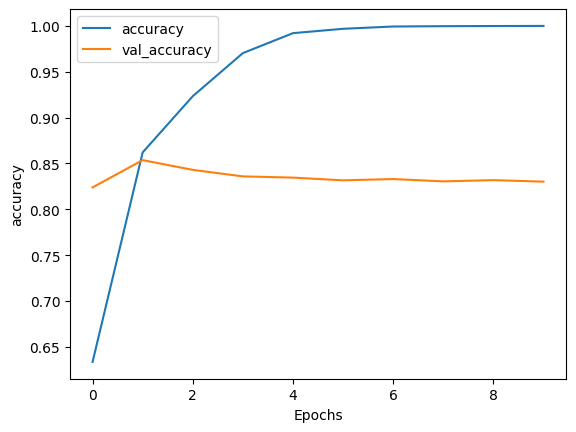

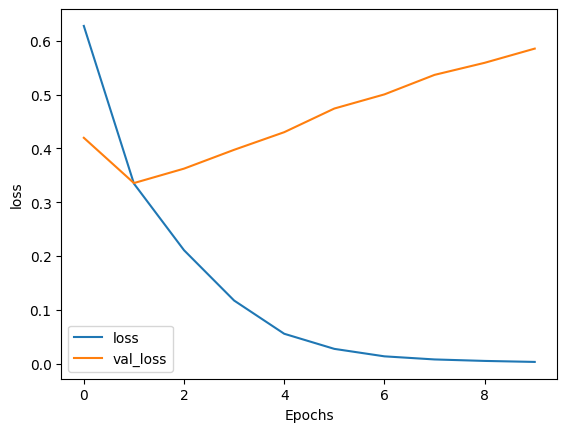

In [22]:
# Plot the accuracy and loss history
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

In [23]:
# Model 2: LSTM

# Parameters for the model
embedding_dim = 16  # Dimensionality of the embedding layer (size of the embedding vectors)
lstm_dim = 32       # Number of units in the LSTM layer
dense_dim = 6       # Number of units in the dense layer

# Model Definition using Keras Sequential API with an LSTM layer
model_lstm = tf.keras.Sequential([
    # Embedding layer to convert integer sequences into dense vectors of fixed size
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # Bidirectional LSTM layer to capture dependencies in both directions
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),

    # Dense layer with ReLU activation function
    tf.keras.layers.Dense(dense_dim, activation='relu'),

    # Output layer with a sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters for the model
model_lstm.compile(
    loss='binary_crossentropy',  # Loss function for binary classification
    optimizer='adam',            # Adam optimizer for training
    metrics=['accuracy']         # Metric to evaluate during training and testing
)

# Print the model summary to display the architecture and number of parameters
model_lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Define training parameters
NUM_EPOCHS = 10     # Number of epochs to train the model
BATCH_SIZE = 128    # Number of samples per gradient update

# Train the model using the fit method
history_lstm = model_lstm.fit(
    padded,                     # Training data (padded sequences)
    training_labels_final,     # Training labels (corresponding to the padded sequences)
    batch_size=BATCH_SIZE,     # Number of samples to process in each iteration
    epochs=NUM_EPOCHS,        # Total number of epochs to train
    validation_data=(testing_padded, testing_labels_final)  # Validation data for evaluating the model after each epoch
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 172ms/step - accuracy: 0.5750 - loss: 0.6614 - val_accuracy: 0.7498 - val_loss: 0.5241
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.7866 - loss: 0.4901 - val_accuracy: 0.8105 - val_loss: 0.4234
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - accuracy: 0.8684 - loss: 0.3331 - val_accuracy: 0.8383 - val_loss: 0.4132
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step - accuracy: 0.9088 - loss: 0.2485 - val_accuracy: 0.8412 - val_loss: 0.3694
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.9252 - loss: 0.2091 - val_accuracy: 0.8411 - val_loss: 0.3813
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.9389 - loss: 0.1770 - val_accuracy: 0.8340 - val_loss: 0.4150
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accuracy: 0.9496 - loss: 0.1516 - val_accuracy: 0.8276 - val_loss: 0.4875
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 44s 189ms/step - accuracy: 0.9560 - loss: 0

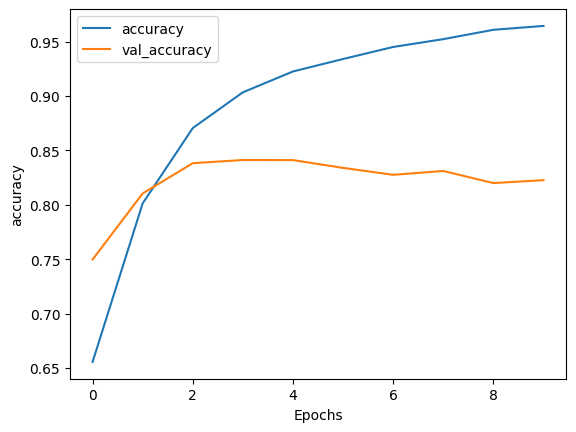

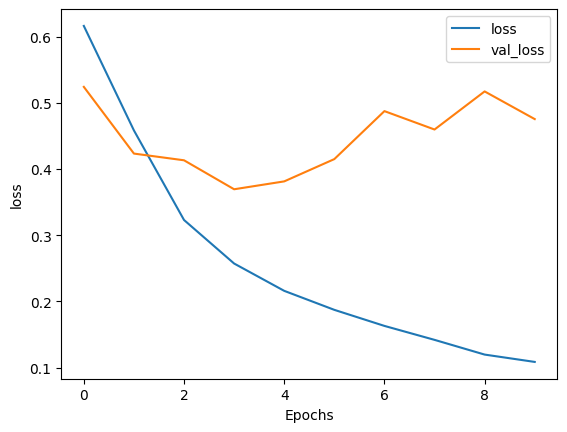

In [25]:
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [26]:
import tensorflow as tf  # Import TensorFlow library

# Parameters for the model
embedding_dim = 16  # Dimensionality of the embedding layer (size of the embedding vectors)
gru_dim = 32        # Number of units in the GRU layer
dense_dim = 6       # Number of units in the dense layer

# Model Definition using Keras Sequential API with a GRU layer
model_gru = tf.keras.Sequential([
    # Embedding layer to convert integer sequences into dense vectors of fixed size
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # Bidirectional GRU layer to capture dependencies in both directions
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),

    # Dense layer with ReLU activation function
    tf.keras.layers.Dense(dense_dim, activation='relu'),

    # Output layer with a sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters for the model
model_gru.compile(
    loss='binary_crossentropy',  # Loss function for binary classification
    optimizer='adam',            # Adam optimizer for training
    metrics=['accuracy']         # Metric to evaluate during training and testing
)

# Print the model summary to display the architecture and number of parameters
model_gru.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 47s 216ms/step - accuracy: 0.5305 - loss: 0.6801 - val_accuracy: 0.8128 - val_loss: 0.4313
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 213ms/step - accuracy: 0.8327 - loss: 0.3866 - val_accuracy: 0.8480 - val_loss: 0.3511
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 214ms/step - accuracy: 0.8933 - loss: 0.2795 - val_accuracy: 0.8462 - val_loss: 0.3555
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 44s 223ms/step - accuracy: 0.9166 - loss: 0.2281 - val_accuracy: 0.8330 - val_loss: 0.4021
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 212ms/step - accuracy: 0.9346 - loss: 0.1851 - val_accuracy: 0.8384 - val_loss: 0.4105
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 213ms/step - accuracy: 0.9433 - loss: 0.1582 - val_accuracy: 0.8303 - val_loss: 0.4924
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 84s 221ms/step - accuracy: 0.9574 - loss: 0.1251 - val_accuracy: 0.8289 - val_loss: 0.4816
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 213ms/step - accuracy: 0.9686 - loss: 0

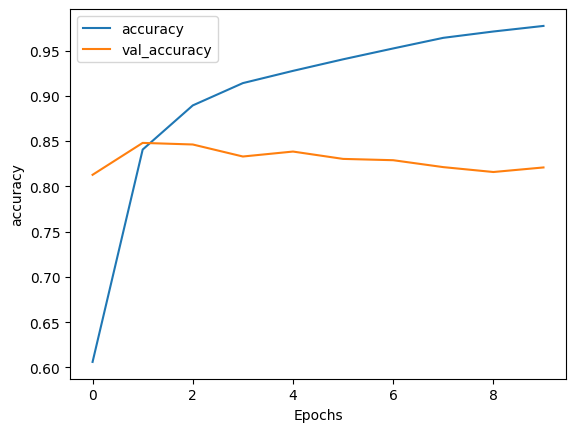

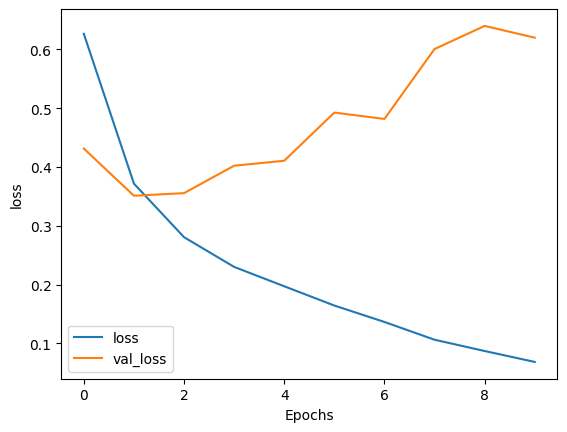

In [28]:
# Plotting the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

In [29]:
import tensorflow as tf  # Import TensorFlow library

# Model 4: 1D Convolution

# Parameters for the model
embedding_dim = 16  # Dimensionality of the embedding layer (size of the embedding vectors)
filters = 128       # Number of filters (kernels) in the Conv1D layer
kernel_size = 5     # Size of the convolutional kernel
dense_dim = 6       # Number of units in the dense layer

# Model Definition using Keras Sequential API with Conv1D layer
model_conv = tf.keras.Sequential([
    # Embedding layer to convert integer sequences into dense vectors of fixed size
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # 1D Convolutional layer to extract features from the embedded sequences
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),

    # Global Average Pooling layer to reduce the dimensionality of the feature maps
    tf.keras.layers.GlobalAveragePooling1D(),

    # Dense layer with ReLU activation function
    tf.keras.layers.Dense(dense_dim, activation='relu'),

    # Output layer with a sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters for the model
model_conv.compile(
    loss='binary_crossentropy',  # Loss function for binary classification
    optimizer='adam',            # Adam optimizer for training
    metrics=['accuracy']         # Metric to evaluate during training and testing
)

# Print the model summary to display the architecture and number of parameters
model_conv.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Define training parameters
NUM_EPOCHS = 10     # Number of epochs to train the model
BATCH_SIZE = 128    # Number of samples per gradient update

# Train the model using the fit method
history_conv = model_conv.fit(
    padded,                     # Training data (padded sequences)
    training_labels_final,     # Training labels (corresponding to the padded sequences)
    batch_size=BATCH_SIZE,     # Number of samples to process in each iteration
    epochs=NUM_EPOCHS,        # Total number of epochs to train
    validation_data=(testing_padded, testing_labels_final)  # Validation data for evaluating the model after each epoch
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.6258 - loss: 0.6352 - val_accuracy: 0.8414 - val_loss: 0.3645
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8690 - loss: 0.3183 - val_accuracy: 0.8490 - val_loss: 0.3447
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9022 - loss: 0.2504 - val_accuracy: 0.8428 - val_loss: 0.3651
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9209 - loss: 0.2094 - val_accuracy: 0.8415 - val_loss: 0.3817
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.9324 - loss: 0.1875 - val_accuracy: 0.8350 - val_loss: 0.4214
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.9443 - loss: 0.1591 - val_accuracy: 0.8290 - val_loss: 0.4565
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9489 - loss: 0.1449 - val_accuracy: 0.8202 - val_loss: 0.4948
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9613 - loss: 0.1219 - va

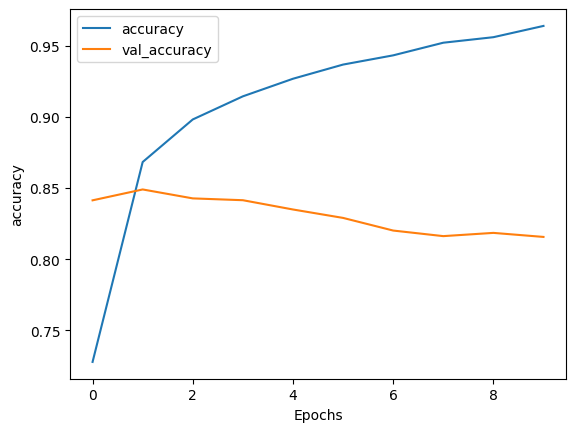

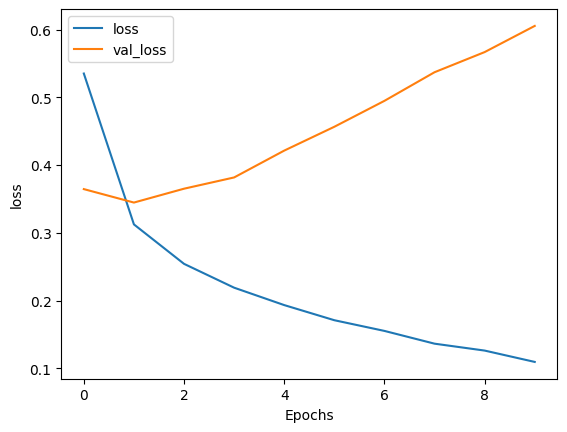

In [31]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')